# **Car Price Prediction**

* In this notebook we will predict selling price of the car using regression by given dataset.

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Reading & Exploring Dataset**

In [2]:
df=pd.read_csv('/content/car_price_data2.csv')


In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
# Checking null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df['Car_age']=2021-df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [10]:
df.drop(labels='Year',axis=1,inplace=True)
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


## **Exploratory Data Analysis**

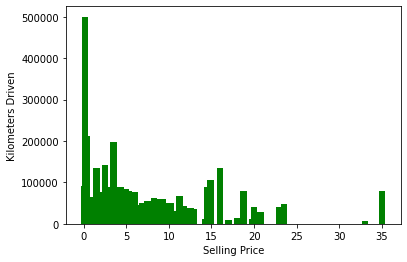

In [11]:
plt.bar(df['Selling_Price'],df['Kms_Driven'],color='g')
plt.ylabel('Kilometers Driven')
plt.xlabel('Selling Price')
plt.show()

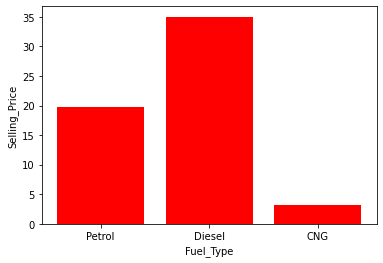

In [12]:
plt.bar(df['Fuel_Type'],df['Selling_Price'],color='r')
plt.ylabel('Selling_Price')
plt.xlabel('Fuel_Type')
plt.show()

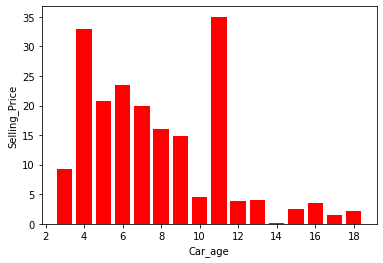

In [13]:
plt.bar(df['Car_age'],df['Selling_Price'],color='r')
plt.ylabel('Selling_Price')
plt.xlabel('Car_age')
plt.show()

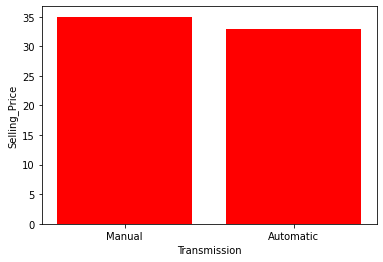

In [14]:
plt.bar(df['Transmission'],df['Selling_Price'],color='r')
plt.ylabel('Selling_Price')
plt.xlabel('Transmission')
plt.show()

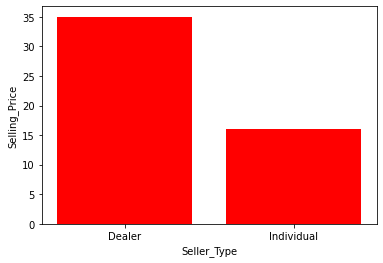

In [15]:
plt.bar(df['Seller_Type'],df['Selling_Price'],color='r')
plt.ylabel('Selling_Price')
plt.xlabel('Seller_Type')
plt.show()

(array([150.,  91.,  34.,   9.,   6.,   5.,   4.,   0.,   0.,   2.]),
 array([ 0.1 ,  3.59,  7.08, 10.57, 14.06, 17.55, 21.04, 24.53, 28.02,
        31.51, 35.  ]),
 <a list of 10 Patch objects>)

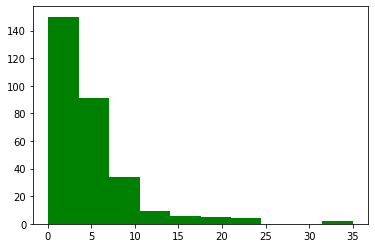

In [16]:
plt.hist(df['Selling_Price'],color='g')


(array([36., 50., 99., 33., 42., 15., 13.,  2.,  8.,  3.]),
 array([ 3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. , 16.5, 18. ]),
 <a list of 10 Patch objects>)

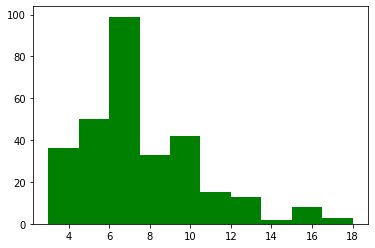

In [17]:
plt.hist(df['Car_age'],color='g')


(array([236.,  57.,   5.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([   500.,  50450., 100400., 150350., 200300., 250250., 300200.,
        350150., 400100., 450050., 500000.]),
 <a list of 10 Patch objects>)

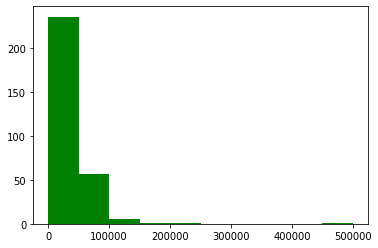

In [18]:
plt.hist(df['Kms_Driven'],color='g')


(array([223.,  58.,  10.,   9.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.32 ,  9.548, 18.776, 28.004, 37.232, 46.46 , 55.688, 64.916,
        74.144, 83.372, 92.6  ]),
 <a list of 10 Patch objects>)

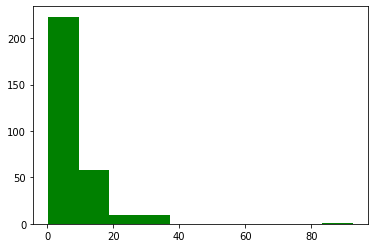

In [19]:
plt.hist(df['Present_Price'],color='g')


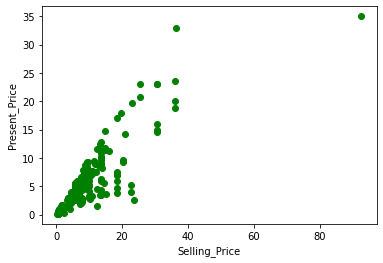

In [20]:
plt.scatter(df['Present_Price'],df['Selling_Price'],color='g')
plt.ylabel('Present_Price')
plt.xlabel('Selling_Price')
plt.show()

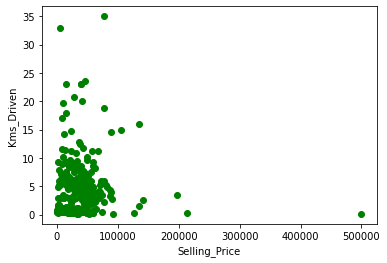

In [21]:
plt.scatter(df['Kms_Driven'],df['Selling_Price'],color='g')
plt.ylabel('Kms_Driven')
plt.xlabel('Selling_Price')
plt.show()

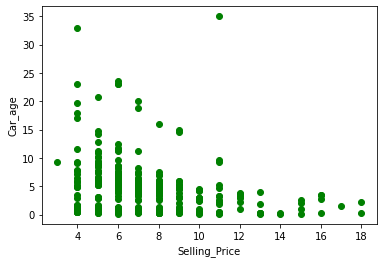

In [22]:
plt.scatter(df['Car_age'],df['Selling_Price'],color='g')
plt.ylabel('Car_age')
plt.xlabel('Selling_Price')
plt.show()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
Car_age,-0.236141,0.047584,0.524342,0.182104,1.000000


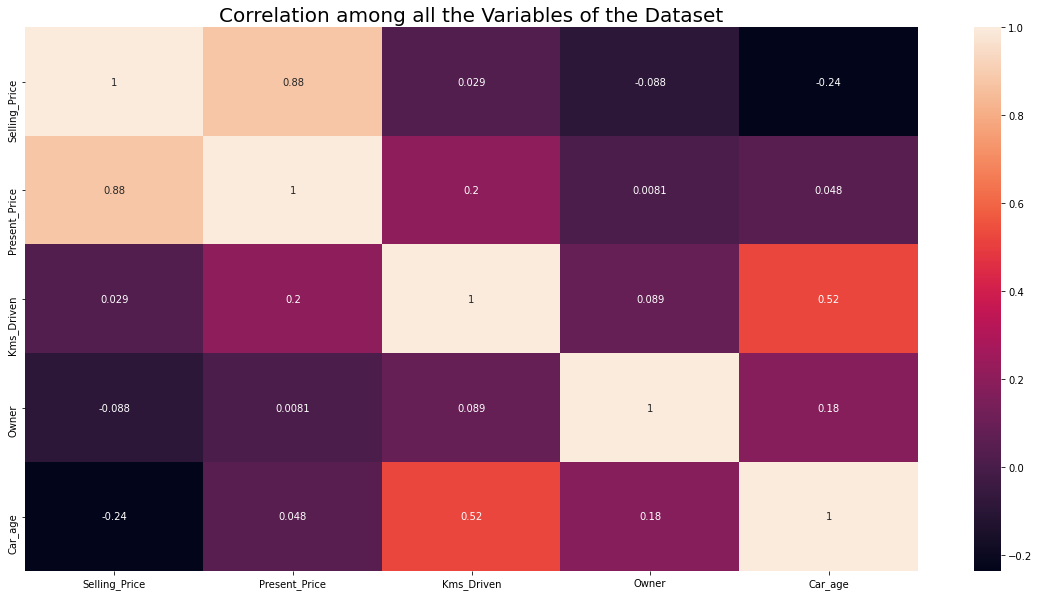

In [23]:
#Checking relationship between variables
cor=df.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

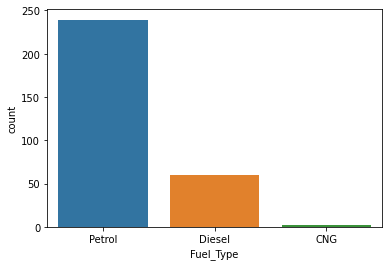

In [24]:
sns.countplot(x='Fuel_Type',data=df)


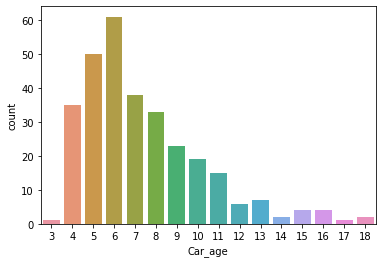

In [25]:
sns.countplot(x='Car_age',data=df)


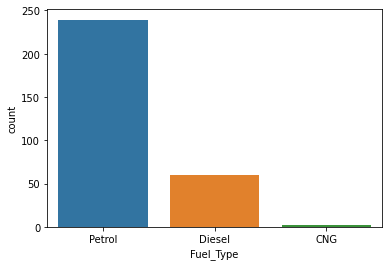

In [26]:
sns.countplot(x='Fuel_Type',data=df)


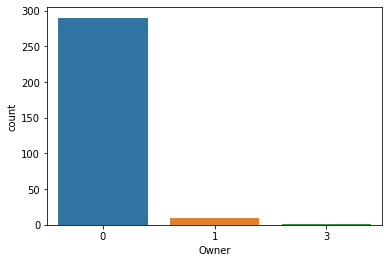

In [27]:
sns.countplot(x='Owner',data=df)


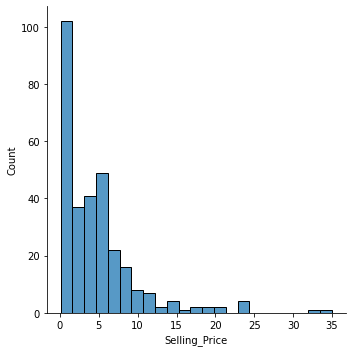

In [28]:
sns.displot(df['Selling_Price'])

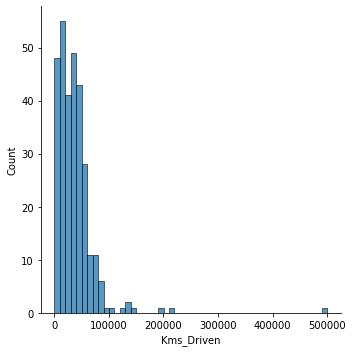

In [29]:
sns.displot(df['Kms_Driven'])

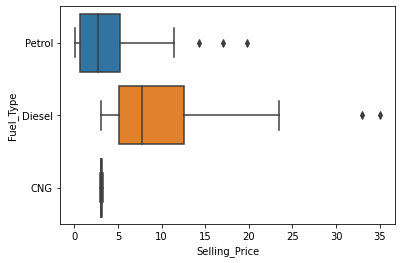

In [30]:
sns.boxplot(x='Selling_Price',y='Fuel_Type',data=df)


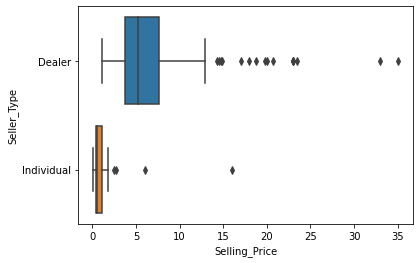

In [31]:
sns.boxplot(x='Selling_Price',y='Seller_Type',data=df)


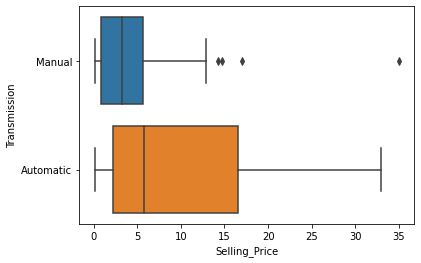

In [32]:
sns.boxplot(x='Selling_Price',y='Transmission',data=df)


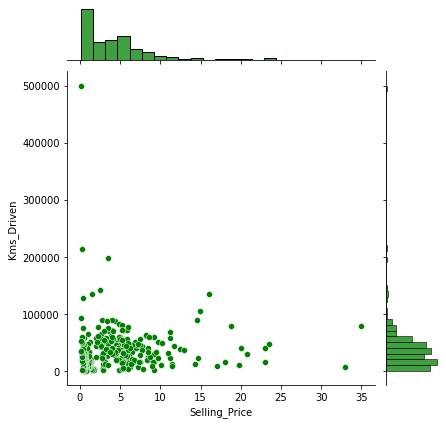

In [33]:
sns.jointplot(x='Selling_Price',y='Kms_Driven',data=df,color='g')


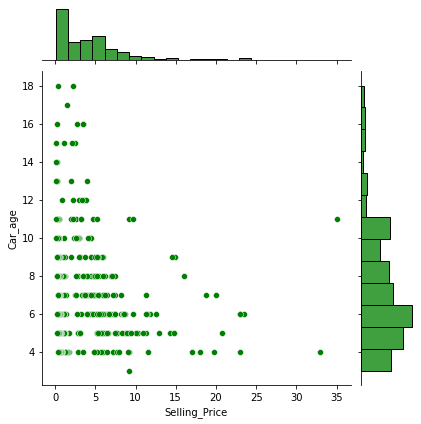

In [34]:
sns.jointplot(x='Selling_Price',y='Car_age',data=df,color='g')


In [35]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


## **Dealing with Categorical variables**

In [36]:
df['Fuel_Type'].unique()


array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [37]:
df['Seller_Type'].unique()


array(['Dealer', 'Individual'], dtype=object)

In [38]:
df['Transmission'].unique()


array(['Manual', 'Automatic'], dtype=object)

In [39]:
df['Car_Name'].unique()


array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [40]:
df=df.drop(labels='Car_Name',axis=1)


In [41]:
clean_data=pd.get_dummies(df,drop_first=True)
clean_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


## **Checking Multicollinearity using VIF**

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=clean_data[['Present_Price','Kms_Driven','Owner','Car_age','Fuel_Type_Diesel','Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual']]

vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif

,VIF,Features
0,3.204463,Present_Price
1,2.892740,Kms_Driven
2,1.087681,Owner
3,10.831000,Car_age
4,4.891105,Fuel_Type_Diesel
5,14.342446,Fuel_Type_Petrol
6,2.230725,Seller_Type_Individual
7,8.392371,Transmission_Manual


In [43]:
data_no_multicollinearity=clean_data.drop(['Fuel_Type_Petrol','Car_age'],axis=1)


In [44]:
variables=clean_data[['Present_Price','Kms_Driven','Owner','Fuel_Type_Diesel','Seller_Type_Individual','Transmission_Manual']]

vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif

,VIF,Features
0,2.200428,Present_Price
1,1.883557,Kms_Driven
2,1.065887,Owner
3,1.669188,Fuel_Type_Diesel
4,1.748669,Seller_Type_Individual
5,2.465705,Transmission_Manual


In [45]:
x=data_no_multicollinearity.drop('Selling_Price',axis=1)
y=data_no_multicollinearity['Selling_Price']

## **Feature Scaling**

In [46]:

from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

## **Split data into training and testing**

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


## **Predictive Modelling**

### **Linear Regression**

In [48]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

from sklearn.metrics import mean_squared_error,r2_score
print("Linear Regression\n")
r_squared=r2_score(y_test,y_pred)
print("R2 Score=",r_squared)
mse=mean_squared_error(y_test,y_pred)
print("Mean Sqaure Error=",mse)


Linear Regression

R2 Score= 0.8794969037706872
Mean Sqaure Error= 3.0459951520930613


### **Decision Tree Regression**

In [49]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
dr=DecisionTreeRegressor(random_state=0)
dr.fit(x_train,y_train)
y_pred1=dr.predict(x_test)
print("Decision Tree\n")
r_squared=r2_score(y_test,y_pred1)
print("R2 Score=",r_squared)
mse=mean_squared_error(y_test,y_pred1)
print("Mean Sqaure Error=",mse)


Decision Tree

R2 Score= 0.9217684905387656
Mean Sqaure Error= 1.977482786885246


### **Random Forest Regression**

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred2=rf.predict(x_test)
print("Random Forest\n")
r_squared=r2_score(y_test,y_pred2)
print("R2 Score=",r_squared)
mse=mean_squared_error(y_test,y_pred2)
print("Mean Sqaure Error=",mse)

Random Forest

R2 Score= 0.918705380196607
Mean Sqaure Error= 2.054910002819899


### **Support Vector Regression**

In [51]:
from sklearn.svm import SVR
svr=SVR(kernel = 'rbf')
svr.fit(x_train,y_train)
y_pred3=svr.predict(x_test)
print("Support Vector Regression\n")
r_squared=r2_score(y_test,y_pred3)
print("R2 Score=",r_squared)
mse=mean_squared_error(y_test,y_pred3)
print("Mean Sqaure Error=",mse)

Support Vector Regression

R2 Score= -0.17556196452080464
Mean Sqaure Error= 29.715054276292825


### **K-Nearest Neighbour Regression**

In [52]:
from sklearn import neighbors
neigh=neighbors.KNeighborsRegressor(n_neighbors=3)
neigh.fit(x_train,y_train)
y_pred4 = neigh.predict(x_test)
print("KNN Regression\n")
r_squared=r2_score(y_test,y_pred4)
print("R2 Score=",r_squared)
mse=mean_squared_error(y_test,y_pred4)
print("Mean Sqaure Error=",mse)

KNN Regression

R2 Score= -0.28376630112038304
Mean Sqaure Error= 32.45016976320583


### **Gradient Boosting Regression**

In [53]:
from sklearn import ensemble
gb=ensemble.GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_pred5 = gb.predict(x_test)
print("Gradient Boosting Regression\n")
r_squared=r2_score(y_test,y_pred5)
print("R2 Score=",r_squared)
mse=mean_squared_error(y_test,y_pred5)
print("Mean Sqaure Error=",mse)

Gradient Boosting Regression

R2 Score= 0.9296573614557884
Mean Sqaure Error= 1.7780732835558706


In [54]:
print(y_pred5)

[ 5.60610852  0.66443361  4.5739566   7.29374986 14.01142125  4.77690539
  3.82463687  0.48113969  4.79924517  5.83710913  3.18709481  0.84294965
  4.5739566   7.48693286  7.09034737 14.49604157  8.40913196  3.90997936
  0.63820105  1.46929644  4.07511725  4.59314007  6.45986544  9.69358571
  0.18770282  0.75215512 -0.05401736  0.54534297  0.63482914  6.70526228
  3.6559851   5.91395585  0.51393547  7.89131126  4.08629984  1.37238143
  6.17322426  4.90752668  0.51315285 10.1344336   7.51054225 21.09609299
  4.80070038  4.14864461  5.44864684 11.18011906  0.38298185  0.71346443
  4.50378862  6.03048142  8.66325923  3.20026693  4.6710513  20.91428384
  1.10525354  1.19624521  0.8920377   2.47811016  3.31009016  3.00591765
  5.58361253]


## **Conclusion**

Gradient Boosting Regression is the best regression model for car price prediction as it gives highest R2 Score and lowest Mean Sqaure Error among all models.